# Train and Predict
Train and evaluate model
- <a href='#1'>1. lightgbm</a> 
- <a href='#2'>2. task2</a> 
- <a href='#3'>3. ensemble</a>

In [1]:
# ! pip install zipfile -i http://mirrors.aliyun.com/pypi/simple/ --trusted-host mirrors.aliyun.com
%load_ext autoreload
%autoreload 1
import sys
import os
import gc
from time import time
from datetime import timedelta, datetime
import base64
import warnings

import pandas as pd
from IPython.core.display import display, HTML
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import lightgbm as lgb
from sklearn import metrics

sys.path.append('../')
import conf
from mlpipeline import (
    feature_engineering,
    train,
    predict,
)
from utils import (
    check_columns,
    check_nan_value,
    correct_column_type,
    load_model,
    plot_dist_of_cols,
)

In [2]:
# global settings
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns',1000)
pd.set_option('display.width',100)
sns.set(rc={'figure.figsize':(20,10)})
os.environ["CUDA_VISIBLE_DEVICES"] = "2"
warnings.simplefilter('ignore', np.RankWarning)

In [3]:
# global variables
drop_cols = []

In [4]:
# functions
def __dummy():
    pass

### <a id='1'> 1.lightgbm</a>

In [5]:
! du -sh ../data/*

'du' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


In [ ]:
# feature engineering
params = {
    'filename':'data_2018_semifinals_all.h5', # file we want to load for feature engineering
    'fe_save_filename':'fe_df_01_01_round_2.feather',  # naming the train fe by the start date of train
    'clip_start_date': '2018-01-01', # start date of data for doing feature engineering e.g. 2018-02-01
    'clip_end_date': '2018-07-31',  # end date of data for doing feature engineering e.g. 2018-06-30
    'use_model_id': None,  # 1,2 and None
    'is_train':True,
    'pred_start_date':None,  # None, 2018-09-01
    'pred_end_date':None,  # None, 2018-09-30
#     'use_retag':False,
#     'num_tag':10,
    'num_processes': 8,
}

fe_df = feature_engineering(**params)

2020-03-29 20:25:59,381 - mlpipeline.feature_engineering - INFO - feature_engineering开始
2020-03-29 20:25:59,384 - mlpipeline.feature_engineering - INFO - 训练数据特征工程: True，数据集截断起始日期：2018-01-01, 数据集截断结束日期：2018-07-31
2020-03-29 20:25:59,384 - mlpipeline.feature_engineering - INFO - _load_data_into_dataframe开始
2020-03-29 20:25:59,385 - mlpipeline.feature_engineering - INFO - 加载数据集: ..\data\data_2018_semifinals_all.h5


2020-03-30 00:30:08,085 - mlpipeline.train - INFO - train开始
2020-03-30 00:30:08,085 - mlpipeline.train - INFO - 当前模式:eval on model None, train on model None, 当前使用模型:lgb, 使用cv:False, 训练集日期:2018-01-01 - 2018-05-31, 验证集日期:2018-07-01 - 2018-07-31, 分类阈值: 0.994, 截断个数: 30, 采样：False, 使用的标签：tag
2020-03-30 00:30:09,573 - mlpipeline.train - INFO - train_pipeline_lgb开始
2020-03-30 00:30:09,574 - mlpipeline.train - INFO - 连续性特征数量: 107
2020-03-30 00:30:09,575 - mlpipeline.train - INFO - 离散性特征数量: 1
2020-03-30 00:30:13,163 - mlpipeline.train - INFO - 训练集正负样本比:16207:2700000(i.e. 0.006)
2020-03-30 00:30:13,275 - mlpipeline.train - INFO - 验证集正负样本比:4433:300000(i.e. 0.01478)
2020-03-30 00:30:13,276 - mlpipeline.train - INFO - eval参数:{'objective': 'binary', 'boosting': 'gbdt', 'learning_rate': 0.001, 'scale_pos_weight': 35, 'num_leaves': 64, 'metric': ['auc'], 'subsample': 0.9, 'colsample_bytree': 0.6, 'num_threads': 10, 'lambda_l2': 1, 'lambda_l1': 1, 'random_state': 2019, 'min_data_in_leaf': 50, 'num_boost

[1]	training's auc: 0.796005	valid_1's auc: 0.692012
Training until validation scores don't improve for 10 rounds.
[2]	training's auc: 0.828419	valid_1's auc: 0.710622
[3]	training's auc: 0.838691	valid_1's auc: 0.720885
[4]	training's auc: 0.844331	valid_1's auc: 0.72708
[5]	training's auc: 0.848705	valid_1's auc: 0.731235
[6]	training's auc: 0.851556	valid_1's auc: 0.730189
[7]	training's auc: 0.854398	valid_1's auc: 0.730295
[8]	training's auc: 0.855735	valid_1's auc: 0.729216
[9]	training's auc: 0.857652	valid_1's auc: 0.727516
[10]	training's auc: 0.860311	valid_1's auc: 0.727158
[11]	training's auc: 0.860688	valid_1's auc: 0.730855
[12]	training's auc: 0.86466	valid_1's auc: 0.73176
[13]	training's auc: 0.868037	valid_1's auc: 0.732097
[14]	training's auc: 0.869784	valid_1's auc: 0.735001
[15]	training's auc: 0.871879	valid_1's auc: 0.73612
[16]	training's auc: 0.87457	valid_1's auc: 0.735054
[17]	training's auc: 0.876586	valid_1's auc: 0.735315
[18]	training's auc: 0.876563	vali

2020-03-30 00:30:36,471 - mlpipeline.train - INFO - eval最优轮数: 19, eval最优auc: 0.736269601473795
2020-03-30 00:30:36,472 - mlpipeline.train - INFO - 模型训练用时:0:00:23
2020-03-30 00:30:36,477 - mlpipeline.train - INFO - 特征重要性：            Value                                        Feature
8    4.412146e+07                               err_weight_max_7
6    2.967268e+07                                     err_weight
96   2.169160e+07                                     smart_5raw
14   1.302638e+07                          seek_err_weight_min_7
107  7.835394e+06                             smart_9_normalized
76   7.800894e+06                                   smart_199raw
5    6.544602e+06                   degradation_err_weight_std_7
98   5.823871e+06                               smart_5raw_max_7
64   5.208594e+06                     smart_195_normalized_min_7
78   4.456472e+06                             smart_199raw_max_7
91   3.319131e+06                                     smart_4raw


[29]	training's auc: 0.889142	valid_1's auc: 0.735055
Early stopping, best iteration is:
[19]	training's auc: 0.876902	valid_1's auc: 0.73627


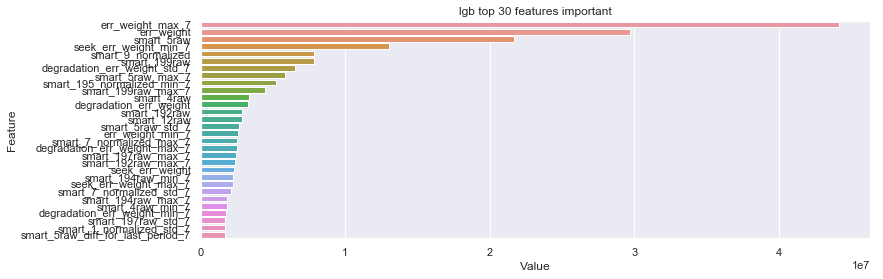

2020-03-30 00:30:37,154 - mlpipeline.train - INFO - 验证日期：2018-07-01 00:00:00
e:\utility\conda\envs\python3.7\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
e:\utility\conda\envs\python3.7\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
2020-03-30 00:30:37,230 - mlpipeline.train - INFO - 原始预测为fault disk的个数：57
2020-03-30 00:30:37,231 - mlpipeline.train - INFO - 验

In [6]:
# eval
model_params = {
    "objective": "binary",
    "boosting": 'gbdt',  # gbdt, dart
    "learning_rate": 0.001,
    "scale_pos_weight":35,
#     "is_unbalance": True,
    "num_leaves": 64,
#     "max_bin":255,
#     'min_gain_to_split': 20,
#     "max_depth":7,
    "metric": ["auc"],
    "subsample": 0.9,
    "colsample_bytree": 0.6,
    "num_threads": 10,
    "lambda_l2": 1,
    "lambda_l1": 1,
    "random_state": 2019,
    "min_data_in_leaf":50,
    "num_boost_round": 1000,
    "device": 'cpu',
#     'boost_from_average':False
}  
# drop_cols = ['err_weight',
#              'err_weight_max_7',
#              'err_weight_min_7',
#              'err_weight_std_7',
#              'err_weight_diff_for_last_period_7',
#              'degradation_err_weight_min_7',
#             'degradation_err_weight_max_7',
#             'degradation_err_weight_std_7',
#             'degradation_err_weight',
#             'degradation_err_weight_diff_for_last_period_7',
#             'seek_err_weight_diff_for_last_period_7',
#             'seek_err_weight',
#             'seek_err_weight_min_7',
#             'seek_err_weight_max_7',
#             'seek_err_weight_std_7',
#             'model_type']
drop_cols = []
params = {
    'model_params': model_params,
    'model_name': 'lgb',
    'fe_filename': 'sample_2700000.0_fe_df_01_01_round_2.feather', #  'sample_1_fe_df_01_01_round_2.feather',‘sample_2700000.0_fe_df_01_01_round_2.feather'
    'is_eval': True,
    'use_standard': False,  # whether using sklearn-standard
    'use_log': False,
    'use_cv': False,  # for cv
    'drop_cols':drop_cols,
    'use_retag': False,
    'num_tag':15,
    'use_sampling': False,
    'train_total_sample_num':2.7e6,
    'valid_total_sample_num':3e5,
#     'sampling_ratio':0.125,  # downsampling
    'save_sample_data':True,
    'random_state':1,
#     'focal_loss_alpha':0.25,
#     'focal_loss_gamma':2,
    'train_start_date': '2018-01-01',  # when using cv, should be same as the the first day of cv train
    'train_end_date': '2018-05-31', # when using cv, should be same as the the last day of cv valid
    'eval_on_model_id': None, # 1,2,None
    'train_on_model_id':None, # 1 ,2 , None
    'save_feat_important': False,
    'valid_start_date':'2018-07-01', 
    'valid_end_date': '2018-07-31',
    'train_date_list':  [['2018-02-01','2018-03-31'],['2018-03-01','2018-04-30']],  # for cv
    'val_date_list': [['2018-05-01','2018-05-31'],['2018-06-01','2018-06-30']],  # for cv
    'n_fold': 2  # for cv 
}

model, eval_df = train(**params)

In [8]:
eval_df.head(5)

,dt,serial_number,model,smart_1_normalized_min_7,smart_3_normalized_min_7,smart_7_normalized_min_7,smart_184_normalized_min_7,smart_187_normalized_min_7,smart_188_normalized_min_7,smart_189_normalized_min_7,smart_191_normalized_min_7,smart_193_normalized_min_7,smart_195_normalized_min_7,smart_4raw_min_7,smart_5raw_min_7,smart_12raw_min_7,smart_192raw_min_7,smart_194raw_min_7,smart_197raw_min_7,smart_198raw_min_7,smart_199raw_min_7,smart_1_normalized_max_7,smart_3_normalized_max_7,smart_7_normalized_max_7,smart_184_normalized_max_7,smart_187_normalized_max_7,smart_188_normalized_max_7,smart_189_normalized_max_7,smart_191_normalized_max_7,smart_193_normalized_max_7,smart_195_normalized_max_7,smart_4raw_max_7,smart_5raw_max_7,smart_12raw_max_7,smart_192raw_max_7,smart_194raw_max_7,smart_197raw_max_7,smart_198raw_max_7,smart_199raw_max_7,smart_1_normalized_std_7,smart_3_normalized_std_7,smart_7_normalized_std_7,smart_184_normalized_std_7,smart_187_normalized_std_7,smart_188_normalized_std_7,smart_189_normalized_std_7,smart_191_normalized_std_7,smart_193_normalized_std_7,smart_195_normalized_std_7,smart_4raw_std_7,smart_5raw_std_7,smart_12raw_std_7,smart_192raw_std_7,smart_194raw_std_7,smart_197raw_std_7,smart_198raw_std_7,smart_199raw_std_7,smart_1_normalized_diff_for_last_period_7,smart_3_normalized_diff_for_last_period_7,smart_7_normalized_diff_for_last_period_7,smart_184_normalized_diff_for_last_period_7,smart_187_normalized_diff_for_last_period_7,smart_188_normalized_diff_for_last_period_7,smart_189_normalized_diff_for_last_period_7,smart_191_normalized_diff_for_last_period_7,smart_193_normalized_diff_for_last_period_7,smart_195_normalized_diff_for_last_period_7,smart_4raw_diff_for_last_period_7,smart_5raw_diff_for_last_period_7,smart_12raw_diff_for_last_period_7,smart_192raw_diff_for_last_period_7,smart_194raw_diff_for_last_period_7,smart_197raw_diff_for_last_period_7,smart_198raw_diff_for_last_period_7,smart_199raw_diff_for_last_period_7,smart_5raw_slope_for_last_duration_7,smart_9_normalized,smart_1_normalized,smart_3_normalized,smart_7_normalized,smart_184_normalized,smart_187_normalized,smart_188_normalized,smart_189_normalized,smart_191_normalized,smart_193_normalized,smart_195_normalized,smart_4raw,smart_5raw,smart_12raw,smart_192raw,smart_194raw,smart_197raw,smart_198raw,smart_199raw,tag,flag,prob,rank,pred
0,2018-07-01,disk_101985,1,64.0,96.0,94.0,100.0,100.0,100.0,98.0,100.0,100.0,51.0,23.0,0.0,21.0,20.0,34.0,0.0,0.0,0.0,83.0,96.0,94.0,100.0,100.0,100.0,98.0,100.0,100.0,59.0,23.0,0.0,21.0,20.0,34.0,0.0,0.0,0.0,6.466028,0.0,1.643637e-07,0.0,0.0,0.0,0.0,0.0,0.0,2.992053,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,83.0,96.0,94.0,100.0,100.0,100.0,98.0,100.0,100.0,53.0,23.0,0.0,21.0,20.0,34.0,0.0,0.0,0.0,1,0,NaN,NaN,0.0
1,2018-07-01,disk_102340,1,72.0,96.0,93.0,100.0,100.0,100.0,100.0,100.0,100.0,47.0,18.0,0.0,15.0,13.0,30.0,0.0,0.0,0.0,83.0,96.0,93.0,100.0,100.0,100.0,100.0,100.0,100.0,61.0,18.0,0.0,15.0,13.0,30.0,0.0,0.0,0.0,3.903600,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,4.923220,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,80.0,96.0,93.0,100.0,100.0,100.0,100.0,100.0,100.0,51.0,18.0,0.0,15.0,13.0,30.0,0.0,0.0,0.0,0,0,NaN,NaN,0.0
2,2018-07-01,disk_71667,1,82.0,95.0,81.0,100.0,100.0,100.0,100.0,100.0,100.0,41.0,18.0,0.0,18.0,17.0,27.0,0.0,0.0,0.0,83.0,95.0,81.0,100.0,100.0,100.0,100.0,100.0,100.0,42.0,18.0,0.0,18.0,17.0,27.0,0.0,0.0,0.0,0.377964,0.0,6.537858e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.377964,0.0,0.0,0.0,0.0,1.613528e-07,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0,83.0,95.0,81.0,100.0,100.0,100.0,100.0,100.0,100.0,42.0,18.0,0.0,18.0,17.0,27.0,0.0,0.0,0.0,0,0,NaN,NaN,0.0
3,2018-07-01,disk_128838,2,83.0,86.0,76.0,100.0,100.0,100.0,100.0,100.0,100.0,4.0,32.0,0.0,33.0,1.0,32.0,0.0,0.0,0.0,83.0,86.0,76.0,100.0,100.0,100

2020-03-30 00:17:53,085 - mlpipeline.train - INFO - train开始
2020-03-30 00:17:53,086 - mlpipeline.train - INFO - 当前模式:train, 当前使用模型:lgb, 训练日期:2018-01-01 - 2018-05-31
2020-03-30 00:17:54,037 - mlpipeline.train - INFO - train_pipeline_lgb开始
2020-03-30 00:17:54,038 - mlpipeline.train - INFO - 连续性特征数量: 107
2020-03-30 00:17:54,039 - mlpipeline.train - INFO - 离散性特征数量: 1
2020-03-30 00:17:57,428 - mlpipeline.train - INFO - 训练集正负样本比:16207:2700000(i.e. 0.006)
2020-03-30 00:17:57,429 - mlpipeline.train - INFO - train参数:{'objective': 'binary', 'boosting': 'gbdt', 'learning_rate': 0.001, 'scale_pos_weight': 35, 'num_leaves': 64, 'metric': ['auc'], 'subsample': 0.9, 'colsample_bytree': 0.6, 'num_threads': 10, 'lambda_l2': 1, 'lambda_l1': 1, 'random_state': 2019, 'min_data_in_leaf': 50, 'num_boost_round': 19, 'device': 'cpu'}


[1]	training's auc: 0.796005
Training until validation scores don't improve for 10 rounds.
[2]	training's auc: 0.828419
[3]	training's auc: 0.838691
[4]	training's auc: 0.844331
[5]	training's auc: 0.848705
[6]	training's auc: 0.851556
[7]	training's auc: 0.854398
[8]	training's auc: 0.855735
[9]	training's auc: 0.857652
[10]	training's auc: 0.860311
[11]	training's auc: 0.860688
[12]	training's auc: 0.86466
[13]	training's auc: 0.868037
[14]	training's auc: 0.869784
[15]	training's auc: 0.871879
[16]	training's auc: 0.87457
[17]	training's auc: 0.876586
[18]	training's auc: 0.876563


2020-03-30 00:18:15,429 - mlpipeline.train - INFO - eval最优轮数: 19, eval最优auc: 0.8769023473967581
2020-03-30 00:18:15,430 - mlpipeline.train - INFO - 模型训练用时:0:00:18
2020-03-30 00:18:15,436 - mlpipeline.train - INFO - 特征重要性：            Value                                        Feature
8    4.412146e+07                               err_weight_max_7
6    2.967268e+07                                     err_weight
96   2.169160e+07                                     smart_5raw
14   1.302638e+07                          seek_err_weight_min_7
107  7.835394e+06                             smart_9_normalized
76   7.800894e+06                                   smart_199raw
5    6.544602e+06                   degradation_err_weight_std_7
98   5.823871e+06                               smart_5raw_max_7
64   5.208594e+06                     smart_195_normalized_min_7
78   4.456472e+06                             smart_199raw_max_7
91   3.319131e+06                                     smart_4raw

[19]	training's auc: 0.876902
Did not meet early stopping. Best iteration is:
[19]	training's auc: 0.876902


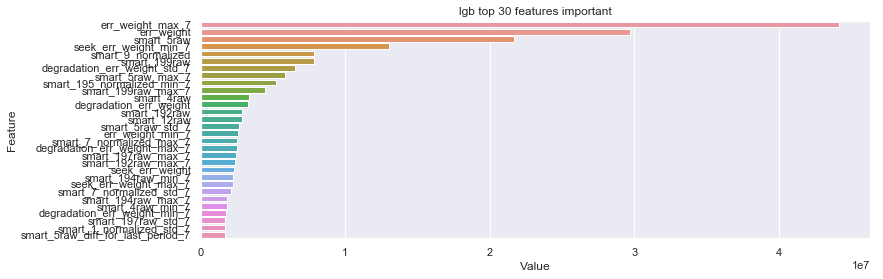

2020-03-30 00:18:16,189 - mlpipeline.train - INFO - train_pipeline_lgb已完成，共用时0:00:22
2020-03-30 00:18:16,497 - mlpipeline.train - INFO - lgb模型训练完成!模型保存至:..\trained_model\lgb.model
2020-03-30 00:18:16,498 - mlpipeline.train - INFO - train已完成，共用时0:00:23


In [8]:
# train
model_params = {
    "objective": "binary",
    "boosting": 'gbdt',  # gbdt, dart
    "learning_rate": 0.001,
    "scale_pos_weight":35,
#     "is_unbalance": True,
    "num_leaves": 64,
#     "max_bin":255,
#     'min_gain_to_split': 20,
#     "max_depth":7,
    "metric": ["auc"],
    "subsample": 0.9,
    "colsample_bytree": 0.6,
    "num_threads": 10,
    "lambda_l2": 1,
    "lambda_l1": 1,
    "random_state": 2019,
    "min_data_in_leaf":50,
    "num_boost_round": 19,
    "device": 'cpu',
#     'boost_from_average':False
}  

params = {
    'model_params': model_params,
    'model_name': 'lgb',
    'fe_filename': 'sample_2700000.0_fe_df_01_01_round_2.feather',
#     'focal_loss_alpha':0.9,
#     'focal_loss_gamma':6,
    'use_sampling': False,
#     'sampling_ratio':0.125,
    'train_total_sample_num':2.7e6,
    'valid_total_sample_num':None,
    'random_state':1,
    'drop_cols': drop_cols,
    'save_sample_data':False,
    'train_on_model_id':None,
    'is_eval': False,
    'use_standard': False,
    'use_log': False,
    'save_feat_important': False,
    'train_start_date': '2018-01-01',
    'train_end_date': '2018-05-31',
}

model, scaler = train(**params)

In [ ]:
# predict 
params = {'model_name': 'lgb',
          'use_standard': False,
          'use_log': False,
          'scaler':'',
            }

submission_df = predict(**params)